<a href="https://colab.research.google.com/github/CaaNTheGreat/tes/blob/main/Restorasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving closeup.jpg to closeup (2).jpg
Saving landscape.jpg to landscape (3).jpg


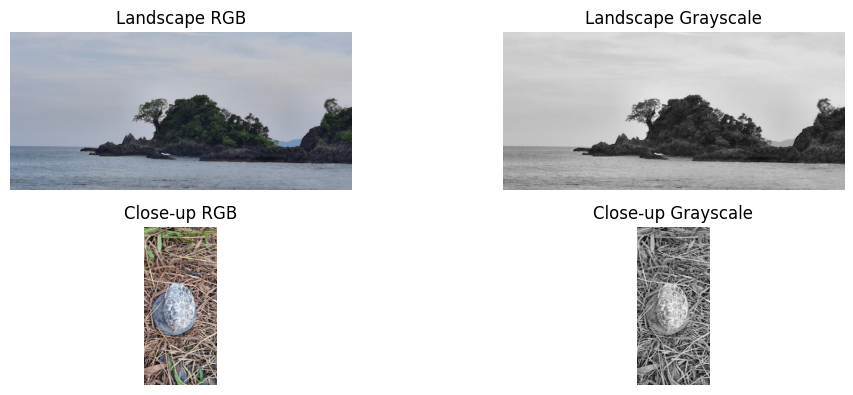

--- LANDSCAPE ---
Salt & Pepper - Median: 10.448963620981388
Salt & Pepper - Mean  : 59.81981149534687
Salt & Pepper - Max   : 1343.017972715736
Gaussian - Median: 12.37445801607445
Gaussian - Mean  : 15.284368390439932
Gaussian - Max   : 131.72331588409475

--- CLOSE-UP ---
Salt & Pepper - Median: 104.77242359348561
Salt & Pepper - Mean  : 191.78956350465313
Salt & Pepper - Max   : 2903.3792327622673
Gaussian - Median: 102.68302929357021
Gaussian - Mean  : 142.2774997356176
Gaussian - Max   : 1249.017582751692


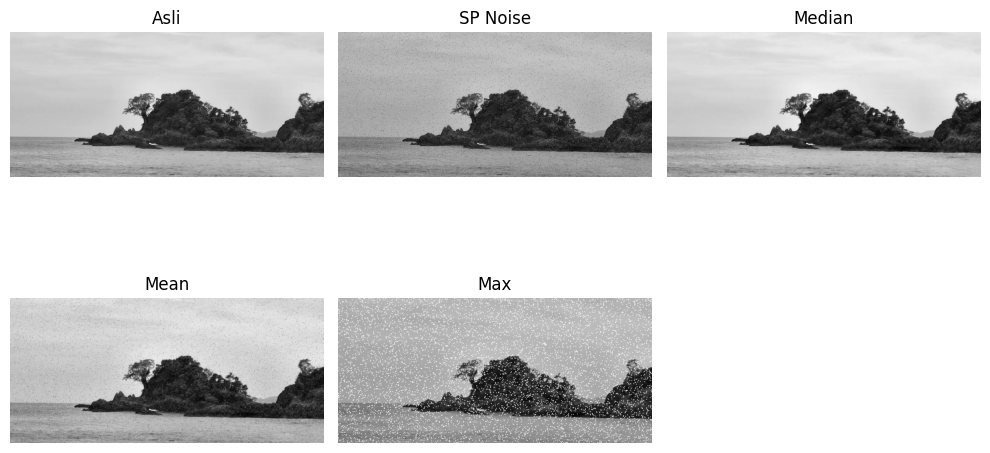

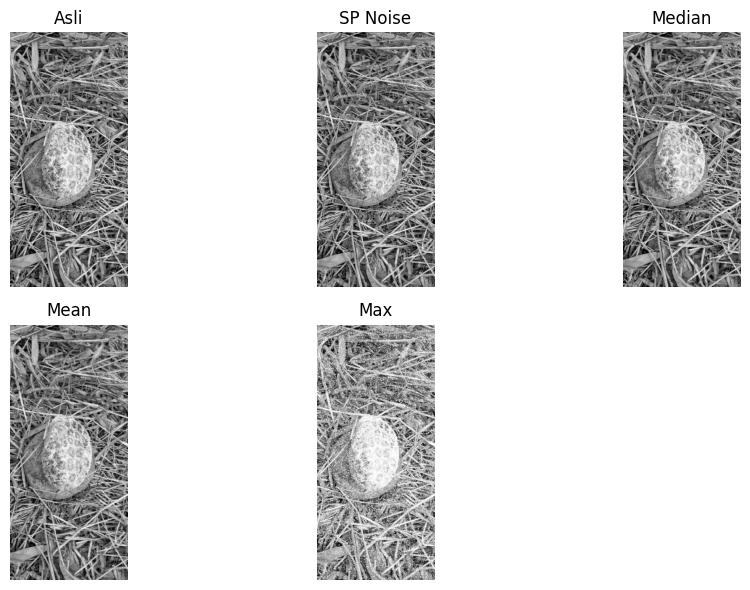

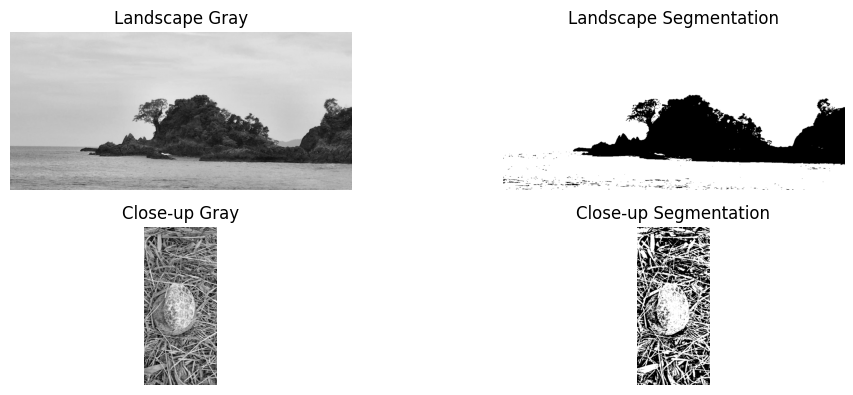

,Jenis Citra,Nilai MSE
0,Landscape SP - Median,10.448964
1,Landscape SP - Mean,59.819811
2,Landscape SP - Max,1343.017973
3,Landscape Gaussian - Median,12.374458
4,Landscape Gaussian - Mean,15.284368
5,Landscape Gaussian - Max,131.723316
6,Close-up SP - Median,104.772424
7,Close-up SP - Mean,191.789564
8,Close-up SP - Max,2903.379233
9,Close-up Gaussian - Median,102.683029


In [1]:
# =========================================
# TEMPLATE GOOGLE COLAB (DISESUAIKAN DENGAN FOTO ICMU)
# TUGAS PENGOLAHAN CITRA: NOISE & RESTORASI
# =========================================

# 1. IMPORT LIBRARY (TANPA scipy / MATLAB)
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# =========================================
# 2. UPLOAD GAMBAR
# Upload 2 gambar:
# - landscape.jpg  (foto pemandangan)
# - closeup.jpg    (foto citra dekat)
# =========================================
uploaded = files.upload()

# =========================================
# 3. LOAD & KONVERSI WARNA
# =========================================

def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

img_landscape = load_image('landscape.jpg')
img_closeup   = load_image('closeup.jpg')

# Konversi ke grayscale
gray_landscape = cv2.cvtColor(img_landscape, cv2.COLOR_RGB2GRAY)
gray_closeup   = cv2.cvtColor(img_closeup, cv2.COLOR_RGB2GRAY)

# =========================================
# 4. TAMPILKAN 4 CITRA ASLI (GROUND TRUTH)
# =========================================

def show_images(images, titles, cols=2):
    plt.figure(figsize=(10,6))
    for i, img in enumerate(images):
        plt.subplot(len(images)//cols + 1, cols, i+1)
        if len(img.shape) == 2:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(img)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(
    [img_landscape, gray_landscape, img_closeup, gray_closeup],
    ['Landscape RGB', 'Landscape Grayscale', 'Close-up RGB', 'Close-up Grayscale'],
    cols=2
)

# =========================================
# 5. FUNGSI PENAMBAHAN NOISE
# =========================================

# Salt & Pepper Noise
def salt_pepper_noise(img, prob=0.02):
    noisy = img.copy()
    rnd = np.random.rand(*img.shape)
    noisy[rnd < prob/2] = 0
    noisy[rnd > 1 - prob/2] = 255
    return noisy

# Gaussian Noise
def gaussian_noise(img, mean=0, var=10):
    noise = np.random.normal(mean, var**0.5, img.shape)
    noisy = img.astype(float) + noise
    noisy = np.clip(noisy, 0, 255)
    return noisy.astype(np.uint8)

# Tambahkan noise
sp_landscape = salt_pepper_noise(gray_landscape)
ga_landscape = gaussian_noise(gray_landscape)

sp_closeup = salt_pepper_noise(gray_closeup)
ga_closeup = gaussian_noise(gray_closeup)

# =========================================
# 6. FILTERING / RESTORASI
# =========================================

kernel = np.ones((3,3), np.uint8)

# Median Filter
med_sp_land = cv2.medianBlur(sp_landscape, 3)
med_ga_land = cv2.medianBlur(ga_landscape, 3)
med_sp_close = cv2.medianBlur(sp_closeup, 3)
med_ga_close = cv2.medianBlur(ga_closeup, 3)

# Mean Filter
mean_sp_land = cv2.blur(sp_landscape, (3,3))
mean_ga_land = cv2.blur(ga_landscape, (3,3))
mean_sp_close = cv2.blur(sp_closeup, (3,3))
mean_ga_close = cv2.blur(ga_closeup, (3,3))

# Max Filter
max_sp_land = cv2.dilate(sp_landscape, kernel)
max_ga_land = cv2.dilate(ga_landscape, kernel)
max_sp_close = cv2.dilate(sp_closeup, kernel)
max_ga_close = cv2.dilate(ga_closeup, kernel)

# =========================================
# 7. FUNGSI MSE
# =========================================

def mse(img1, img2):
    return np.mean((img1.astype(float) - img2.astype(float)) ** 2)

# =========================================
# 8. HITUNG & TAMPILKAN NILAI MSE
# =========================================

print('--- LANDSCAPE ---')
print('Salt & Pepper - Median:', mse(gray_landscape, med_sp_land))
print('Salt & Pepper - Mean  :', mse(gray_landscape, mean_sp_land))
print('Salt & Pepper - Max   :', mse(gray_landscape, max_sp_land))

print('Gaussian - Median:', mse(gray_landscape, med_ga_land))
print('Gaussian - Mean  :', mse(gray_landscape, mean_ga_land))
print('Gaussian - Max   :', mse(gray_landscape, max_ga_land))

print('\n--- CLOSE-UP ---')
print('Salt & Pepper - Median:', mse(gray_closeup, med_sp_close))
print('Salt & Pepper - Mean  :', mse(gray_closeup, mean_sp_close))
print('Salt & Pepper - Max   :', mse(gray_closeup, max_sp_close))

print('Gaussian - Median:', mse(gray_closeup, med_ga_close))
print('Gaussian - Mean  :', mse(gray_closeup, mean_ga_close))
print('Gaussian - Max   :', mse(gray_closeup, max_ga_close))

# =========================================
# 9. VISUALISASI HASIL (CONTOH)
# =========================================

show_images(
    [gray_landscape, sp_landscape, med_sp_land, mean_sp_land, max_sp_land],
    ['Asli', 'SP Noise', 'Median', 'Mean', 'Max'],
    cols=3
)

show_images(
    [gray_closeup, sp_closeup, med_sp_close, mean_sp_close, max_sp_close],
    ['Asli', 'SP Noise', 'Median', 'Mean', 'Max'],
    cols=3
)

# =========================================
# =========================================
# 10. SEGMENTASI CITRA (VERSI JAGA-JAGA)
# =========================================

# Segmentasi sederhana menggunakan Thresholding
# (Cocok untuk penjelasan dasar segmentasi citra)

# Threshold Otsu untuk citra grayscale
_, seg_landscape = cv2.threshold(gray_landscape, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, seg_closeup   = cv2.threshold(gray_closeup, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Tampilkan hasil segmentasi
show_images(
    [gray_landscape, seg_landscape, gray_closeup, seg_closeup],
    ['Landscape Gray', 'Landscape Segmentation', 'Close-up Gray', 'Close-up Segmentation'],
    cols=2
)

# =========================================
# 11. TABEL MSE OTOMATIS
# =========================================
# =========================================

import pandas as pd

rows = [
    ['Landscape SP - Median', mse(gray_landscape, med_sp_land)],
    ['Landscape SP - Mean', mse(gray_landscape, mean_sp_land)],
    ['Landscape SP - Max', mse(gray_landscape, max_sp_land)],
    ['Landscape Gaussian - Median', mse(gray_landscape, med_ga_land)],
    ['Landscape Gaussian - Mean', mse(gray_landscape, mean_ga_land)],
    ['Landscape Gaussian - Max', mse(gray_landscape, max_ga_land)],
    ['Close-up SP - Median', mse(gray_closeup, med_sp_close)],
    ['Close-up SP - Mean', mse(gray_closeup, mean_sp_close)],
    ['Close-up SP - Max', mse(gray_closeup, max_sp_close)],
    ['Close-up Gaussian - Median', mse(gray_closeup, med_ga_close)],
    ['Close-up Gaussian - Mean', mse(gray_closeup, mean_ga_close)],
    ['Close-up Gaussian - Max', mse(gray_closeup, max_ga_close)],
]

mse_table = pd.DataFrame(rows, columns=['Jenis Citra', 'Nilai MSE'])
mse_table

